In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np


TypeError: float() argument must be a string or a real number, not 'datetime.time'

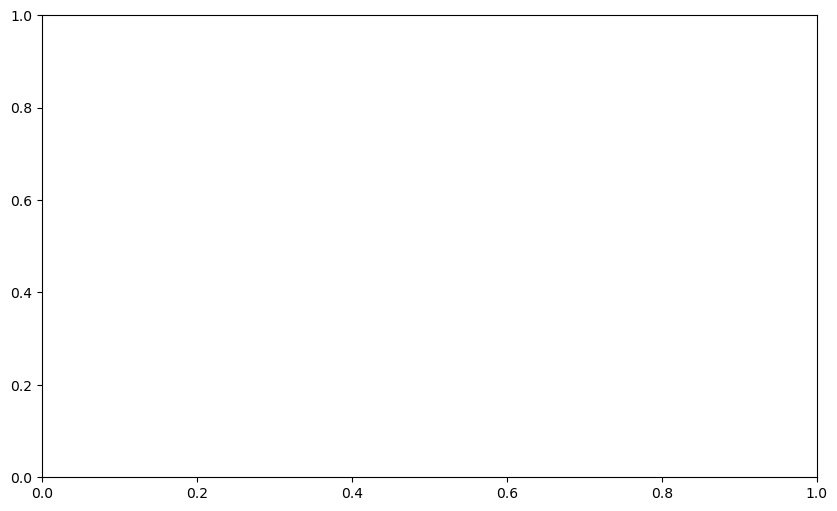

In [ ]:
df= pd.read_excel("/Users/snip/Documents/MEOP/Diameter runs for fitting/1_5625_trial.xlsx")
df.drop(columns=["Time - Voltage (Formula Result)","Polarization (%) - Voltage (Formula Result)"], inplace=True)
df.rename(columns={"Time - Voltage (Formula Result).1":"time","Polarization (%) - Voltage (Formula Result).1":"polarization"}, inplace=True)


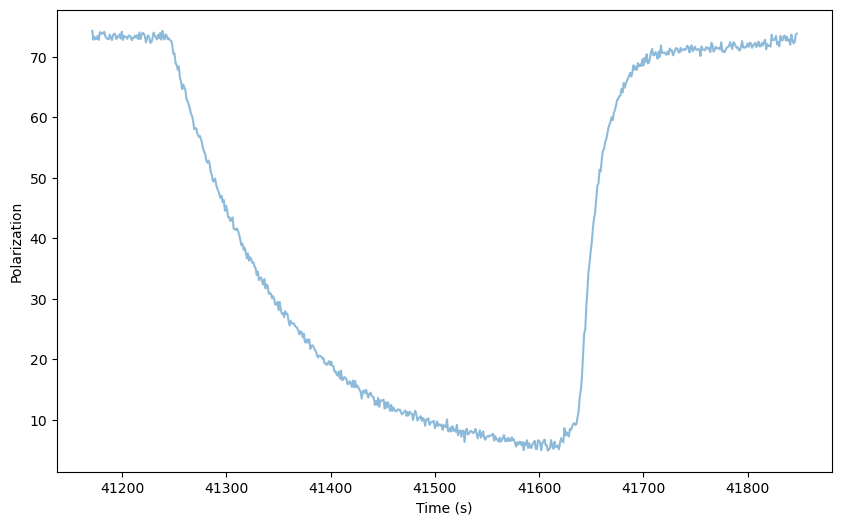

,time,polarization
0,41171.468,74.3014
1,41172.516,72.8020
2,41173.569,73.3025
3,41174.617,72.8840
4,41175.669,72.9517
...,...,...
639,41842.809,72.7743
640,41843.859,72.2355
641,41844.903,72.3949
642,41845.948,73.5830


In [10]:
# Convert time string to seconds
# Handle both "MM:SS" and "HH:MM:SS" formats
def time_to_seconds(time_str):
    parts = str(time_str).split(':')
    if len(parts) == 2:  # MM:SS format
        return int(parts[0]) * 60 + float(parts[1])
    elif len(parts) == 3:  # HH:MM:SS format
        return int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
    else:
        return float(time_str)  # Already in seconds

df["time"] = df["time"].apply(time_to_seconds)
plt.figure(figsize=(10,6))
plt.plot(df["time"], df["polarization"], label="Raw Data", alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Polarization")
plt.show()
df

In [6]:


df["smoothed"] = savgol_filter(df["polarization"], 60, 3)

max_index = df["smoothed"].idxmax()
max_pol= df["smoothed"][max_index]
target_value=max_pol/np.e 
relaxation_data = df.iloc[max_index:]
relaxation_data=relaxation_data[relaxation_data["smoothed"]>target_value]
max_time=df["time"][max_index]
relaxation_time= relaxation_data["time"].iloc[-1]-max_time
print(f"Relaxation time: {relaxation_time} seconds")


Relaxation time: 619.8389999999999 seconds


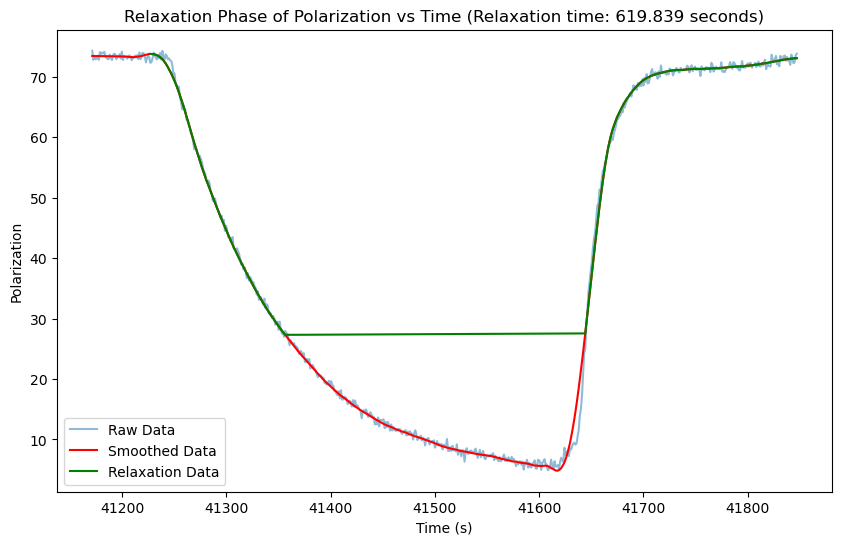

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df["time"], df["polarization"], label="Raw Data", alpha=0.5)
plt.plot(df["time"], df["smoothed"], label="Smoothed Data", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Polarization")
plt.title("Polarization vs Time with Smoothing")
plt.legend()
plt.plot(relaxation_data["time"], relaxation_data["smoothed"], label="Relaxation Data", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Polarization")      
plt.title(f"Relaxation Phase of Polarization vs Time (Relaxation time: {np.round(relaxation_time, 3)} seconds)")
plt.legend()
plt.show()

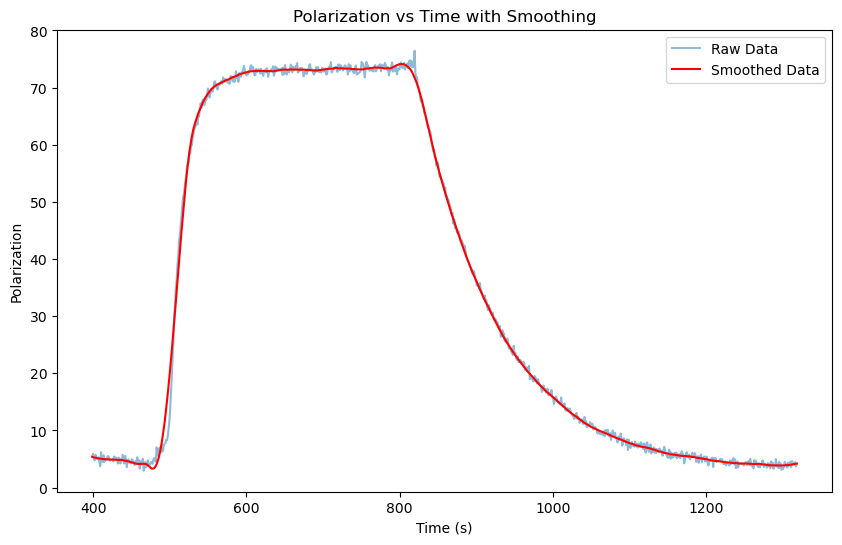

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df["time"], df["polarization"], label="Raw Data", alpha=0.5)
plt.plot(df["time"], df["smoothed"], label="Smoothed Data", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Polarization")
plt.title("Polarization vs Time with Smoothing")
plt.legend()
plt.show()